In [1]:
import os,sys
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#get pretrained model
inet_model = inc_net.InceptionV3()

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02114548', 'white_wolf', 0.89653903)
('n02114367', 'timber_wolf', 0.010256501)
('n02114855', 'coyote', 0.0018800222)
('n02109961', 'Eskimo_dog', 0.0015281732)
('n02111889', 'Samoyed', 0.0014995857)


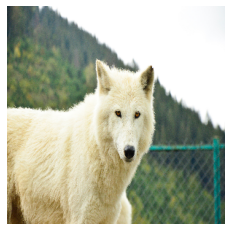

In [4]:
#Inception model can predict all kinds of objects
#Change the filename to the name of your picture
filename='whitewolf.jpg'
images = transform_img_fn([os.path.join('/content/',filename)])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.axis('off')
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
#show top 5 predictions
for x in decode_predictions(preds)[0]:
    print(x)


Explanations


In [5]:
try:
  import lime
  from lime import lime_image
except:
  !pip install lime
  import lime
  from lime import lime_image


In [6]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5)

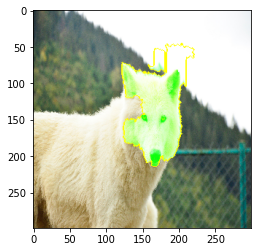

In [7]:
#Explanation for the top prediction: white wolf
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


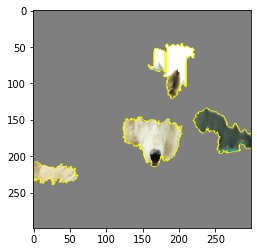

In [8]:
#Explanation of the third prediction: coyote
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

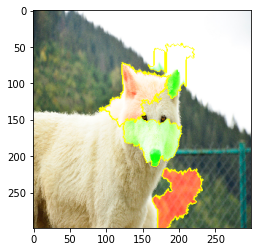

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

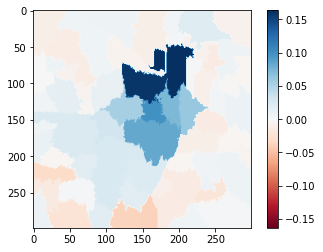

In [10]:
#Show the weight distribution of explanation using heatmap
#The correct prediction white wolf
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

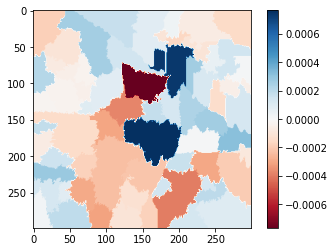

In [11]:
#Show the weight distribution of explanation using heatmap
#The false prediction coyote
ind =  explanation.top_labels[2]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()